# Sprint 8 Project

## Introduction

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

They need to be able to predict whether a customer will leave the bank soon. They have provided data on the clients' past behavior and termination of contracts with the bank.

I will be building a model with the maximum possible F1 score. The end goal will be to arrive at a minimum F1 score of 0.59. 

---
**Data Structure**

*Features*

`RowNumber` — data string index\
`CustomerId` — unique customer identifier\
`Surname` — surname\
`CreditScore` — credit score\
`Geography` — country of residence\
`Gender` — gender\
`Age` — age\
`Tenure` — period of maturation for a customer’s fixed deposit (years)\
`Balance` — account balance\
`NumOfProducts` — number of banking products used by the customer\
`HasCrCard` — customer has a credit card\
`IsActiveMember` — customer’s activeness\
`EstimatedSalary` — estimated salary\

Target

`Exited` — сustomer has left

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Investigating the Null values in 'Tenure'

In [5]:
null_tenure = df[df['Tenure'].isnull()]

null_tenure

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [7]:
print('Tenure Median', df['Tenure'].median())
print('Tenure Mean', df['Tenure'].mean())

Tenure Median 5.0
Tenure Mean 4.997690023099769


Since the Null values account for over 9% of the total data, I will need to fill them in with some value -- that is too many records to just remove from analysis.\
The Median and Mean are nearly identical. To keep things consistent, I will fill with the Median value.

In [8]:
# filling null values of Tenure with the median value of Tenure, which is 5
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
# looking at possible duplicates

df.duplicated().sum()

0

In [10]:
# dropping RowNumber because an additional index should have no relevent data on each customer
df = df.drop('RowNumber', axis=1)

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [11]:
# removing CustomerId and Surname because they are not necessary

df = df.drop(['CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Observations**

Null values have been filled in with the Median value, duplicates have been checked, and categorical variables have been dealt with. I chose to remove CustomerId and Surname because those features should not produce any meaningful learning data. I went with One-Hot Encoding for the remaining categorical variables, because there are only a small handful of dummy features needed, rather than a large list. 

Moving forward, I will split the data into training, validation and testing sets.

## Splitting The Data

In [13]:
# using train_test_split to split our data into 60% training set and 40% temp set

training, temp = train_test_split(df, test_size=0.4, random_state=1)

# using train_test_split again to split our temp dataset 50%, leaving a total of 20% valid and 20% test

validation, testing = train_test_split(temp, test_size=0.5, random_state=1)

In [14]:
training.shape

(6000, 12)

In [15]:
validation.shape

(2000, 12)

In [16]:
testing.shape

(2000, 12)

In [17]:
features_training = training.drop(['Exited'], axis=1)
target_training = training['Exited']

features_validation = validation.drop(['Exited'], axis=1)
target_validation = validation['Exited']

features_testing = testing.drop(['Exited'], axis=1)
target_testing = testing['Exited']

Looking into the class balance

In [18]:
# Examining how many 1s we have vs how many 0s we have in the target sets

features_zeros = features_training[target_training == 0]
features_ones = features_training[target_training == 1]

target_zeros = target_training[target_training == 0]
target_ones = target_training[target_training == 1]

In [19]:
print('features_zeros:', features_zeros.shape)
print('features_ones:', features_ones.shape)
print('target_zeros:', target_zeros.shape)
print('target_ones:', target_ones.shape)

features_zeros: (4804, 11)
features_ones: (1196, 11)
target_zeros: (4804,)
target_ones: (1196,)


**Observations**

There's roughly 4x more zeroes than ones in the classes. Before any class balance is done, I will first train and evaluate various models to see if any class balance is required. 

In [20]:
features_training.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5834,793,32,2.0,0.00,2,1,0,193817.63,0,0,1
2959,530,25,9.0,162560.32,1,1,0,64129.03,0,0,1
2537,573,33,5.0,90124.64,1,1,0,137476.71,0,0,0
166,704,24,7.0,113034.22,1,1,0,162503.48,1,0,0
9083,427,40,8.0,0.00,2,1,1,82870.75,0,1,1


## Model Development (With Imbalanced Classes)

### Decision Tree

In [21]:
%%time
# starting with decision tree

model_tree = DecisionTreeClassifier(random_state=1)

# using RandomSearchCV to tune the hyperparameters

param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 15),  # Example range for max_depth
    'min_samples_split': randint(2, 10),  # Example range for min_samples_split
    'min_samples_leaf': randint(1, 10)  # Example range for min_samples_leaf
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model_tree, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='f1', random_state=1)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search.fit(features_training, target_training)

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 3, 'splitter': 'random'}
Best F1 score found:  0.5648997383413373
CPU times: user 9.43 s, sys: 4.76 ms, total: 9.43 s
Wall time: 9.47 s


#### Optimized Model

In [22]:
# creating new decision tree model with parameters gathered from RandomizedSearchCV 
model_tree_opt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9, min_samples_split=3, 
                                       splitter='random', random_state=1)

model_tree_opt.fit(features_training, target_training)

predictions_tree_opt_valid = model_tree_opt.predict(features_validation)

print('Optimized DecisionTree F1:', f1_score(target_validation, predictions_tree_opt_valid))

probabilities_valid = model_tree_opt.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized DecisionTree AUC-ROC:', auc_roc)

Optimized DecisionTree F1: 0.5814977973568282
Optimized DecisionTree AUC-ROC: 0.8343053648013792


### Random Forest

In [23]:
%%time
# Random Forest

# Define the hyperparameters 
param_dist = {
    'n_estimators': randint(10, 100),  # Number of trees in the forest
    'max_depth': list(np.arange(5, 25, 5)),  # Maximum number of levels in tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples required at each leaf node
}

# Create a RandomForestClassifier
model_forest = RandomForestClassifier(random_state=1)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model_forest, param_distributions=param_dist,
                                   n_iter=40, cv=5, scoring='f1', random_state=1)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search.fit(features_training, target_training)  

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 51}
Best F1 score found:  0.5665362614391952
CPU times: user 1min 12s, sys: 166 ms, total: 1min 13s
Wall time: 1min 13s


#### Optimized Model

In [24]:
# creating new random forest model with parameters gathered from RandomizedSearchCV

model_forest_opt = RandomForestClassifier(random_state=1, max_depth=15, min_samples_leaf=1, min_samples_split=2,
                                         n_estimators=51)

model_forest_opt.fit(features_training, target_training)

predictions_forest_opt_valid = model_forest_opt.predict(features_validation)

print('Optimized RandomForest F1:', f1_score(target_validation, predictions_forest_opt_valid))

probabilities_valid = model_forest_opt.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized RandomForest AUC-ROC:', auc_roc)

Optimized RandomForest F1: 0.5946745562130177
Optimized RandomForest AUC-ROC: 0.8553280211324706


### Logistic Regression

In [25]:
%%time
# Logistic Regression


# Define the hyperparameters you want to tune
param_dist = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': uniform(loc=0, scale=4)  # Inverse of regularization strength
}

# Create a LogisticRegression model
model_lr = LogisticRegression(solver='liblinear', random_state=1)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model_lr, param_distributions=param_dist,
                                   n_iter=75, cv=5, scoring='f1', random_state=1)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search.fit(features_training, target_training)  

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'C': 1.668088018810296, 'penalty': 'l1'}
Best F1 score found:  0.29509742000976413
CPU times: user 27.4 s, sys: 36.1 s, total: 1min 3s
Wall time: 1min 3s


#### Optimized Model

In [26]:
# creating new random forest model with parameters gathered from RandomizedSearchCV

model_lr_opt = LogisticRegression(solver='liblinear', random_state=1,
                                 penalty='l1', C=1.668088018810296)

model_lr_opt.fit(features_training, target_training)

predictions_lr_opt_valid = model_lr_opt.predict(features_validation)

print('Optimized LogisticRegression F1:', f1_score(target_validation, predictions_forest_opt_valid))

probabilities_valid = model_lr_opt.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized LogisticRegression AUC-ROC:', auc_roc)

Optimized LogisticRegression F1: 0.5946745562130177
Optimized LogisticRegression AUC-ROC: 0.7713622530872091


**Observations**

I first used RandomizedSearchCV to randomize my way to an optimized model. Once I had a good set of hyperparameters determined, I created optimized models of a Decision Tree, and Random Forest and a Logistic Regression. Here is how they ranked:

* Logistic Regression: F1 score of 0.595
* Random Forest: F1 score of 0.595
* Decision Tree: F1 score of 0.581

The Logistic Regression and Random Forest had the same F1 scores. I technically ranked the Logistic Regression higher because it runs faster than the Random Forest.

## Class Balance

For fun, I will try the Optimized Models again, but setting the `class_weight='balanced'` argument, using the samee parameters as above.

In [27]:
# Decision Tree

model_tree_opt_2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, min_samples_split=6, 
                                       splitter='best', class_weight='balanced', random_state=1)

model_tree_opt_2.fit(features_training, target_training)

predictions_tree_opt_2_valid = model_tree_opt_2.predict(features_validation)

print('Optimized Balanced DecisionTree F1:', f1_score(target_validation, predictions_tree_opt_2_valid))

Optimized Balanced DecisionTree F1: 0.5916515426497277


In [28]:
# Random Forest

model_forest_opt_2 = RandomForestClassifier(random_state=1, max_depth=15, min_samples_leaf=1, min_samples_split=2,
                                         n_estimators=51, class_weight='balanced')

model_forest_opt_2.fit(features_training, target_training)

predictions_forest_opt_2_valid = model_forest_opt_2.predict(features_validation)

print('Optimized Balanced RandomForest F1:', f1_score(target_validation, predictions_forest_opt_2_valid))

Optimized Balanced RandomForest F1: 0.5950653120464441


In [29]:
# Logistic Regression

model_lr_opt_2 = LogisticRegression(random_state=1, class_weight='balanced', solver='liblinear',
                                   penalty='l1', C=3.8950220753658367)

model_lr_opt_2.fit(features_training, target_training)

predictions_lr2_valid = model_lr_opt_2.predict(features_validation)

print('Optimized Balanced LogisticRegression F1:', f1_score(target_validation, predictions_lr2_valid))

Optimized Balanced LogisticRegression F1: 0.5080713678844521


Since I have already split the training set into positive and negative observations, I can use those same variables below for the upsampling and downsampling.

In [30]:
# multiplying the ones by 3 to triple the amount of 1s in the dataset
features_upsampled = pd.concat([features_zeros] + [features_ones] * 3)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 3)

# shuffling the new upsampled data
features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1)

# using sample() along with the frac argument to grab a fraction of the data
features_downsampled = pd.concat(
        [features_zeros.sample(frac=0.25, random_state=1)]
        + [features_ones]
    )
target_downsampled = pd.concat(
        [target_zeros.sample(frac=0.25, random_state=1)]
        + [target_ones]
    )

In [31]:
features_downsampled.shape

(2397, 11)

In [32]:
target_downsampled.shape

(2397,)

In [33]:
features_upsampled.shape

(8392, 11)

In [34]:
target_upsampled.shape

(8392,)

Now we have datasets that address the class imbalances, with both upsampled and downsampled data. 

I will retry training the models.

With new datasets with hopefully more balanced classes, I'll likely need to retune the hyperparameters, so I will be starting from scratch.

## Model Development (With Balanced Classes)

### Decision Tree

In [35]:
%%time
# starting with decision tree

model_tree = DecisionTreeClassifier(random_state=1)

# using RandomSearchCV to tune the hyperparameters

param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 15),  # Example range for max_depth
    'min_samples_split': randint(2, 10),  # Example range for min_samples_split
    'min_samples_leaf': randint(1, 10)  # Example range for min_samples_leaf
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model_tree, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='f1', random_state=1)

# Perform RandomizedSearchCV to find the best hyperparameters with upsampled data
random_search.fit(features_upsampled, target_upsampled)

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best F1 score found:  0.8478604729056999
CPU times: user 11.4 s, sys: 0 ns, total: 11.4 s
Wall time: 11.4 s


In [36]:
# Perform RandomizedSearchCV to find the best hyperparameters with downsampled data
random_search.fit(features_downsampled, target_downsampled)

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 5, 'splitter': 'best'}
Best F1 score found:  0.7551359434372609


#### Optimized Models

In [37]:
# creating new decision tree model with parameters gathered from RandomizedSearchCV 
# upsampled data
model_tree_opt_up = DecisionTreeClassifier(max_depth=14, min_samples_leaf=1, min_samples_split=5, 
                                       splitter='best', random_state=1)

model_tree_opt_up.fit(features_upsampled, target_upsampled)

predictions_tree_opt_up_valid = model_tree_opt_up.predict(features_validation)

print('Optimized DecisionTree F1:', f1_score(target_validation, predictions_tree_opt_up_valid))

probabilities_valid = model_tree_opt_up.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized DecisionTree AUC-ROC:', auc_roc)

Optimized DecisionTree F1: 0.5249457700650759
Optimized DecisionTree AUC-ROC: 0.7076587154141577


In [38]:
# creating new decision tree model with parameters gathered from RandomizedSearchCV 
# downsampled data
model_tree_opt_down = DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=5, 
                                       splitter='best', random_state=1)

model_tree_opt_down.fit(features_downsampled, target_downsampled)

predictions_tree_opt_down_valid = model_tree_opt_down.predict(features_validation)

print('Optimized DecisionTree F1:', f1_score(target_validation, predictions_tree_opt_down_valid))

probabilities_valid = model_tree_opt_down.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized DecisionTree AUC-ROC:', auc_roc)

Optimized DecisionTree F1: 0.5684575389948007
Optimized DecisionTree AUC-ROC: 0.8354945175620037


### Random Forest

In [39]:
%%time
# Random Forest

# Define the hyperparameters 
param_dist = {
    'n_estimators': randint(10, 100),  # Number of trees in the forest
    'max_depth': list(np.arange(5, 25, 5)),  # Maximum number of levels in tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples required at each leaf node
}

# Create a RandomForestClassifier
model_forest = RandomForestClassifier(random_state=1)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model_forest, param_distributions=param_dist,
                                   n_iter=30, cv=5, scoring='f1', random_state=1)

# Perform RandomizedSearchCV to find the best hyperparameters with upsampled data
random_search.fit(features_upsampled, target_upsampled)  

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 87}
Best F1 score found:  0.940279617355898
CPU times: user 1min 16s, sys: 20.3 ms, total: 1min 16s
Wall time: 1min 16s


In [40]:
# Perform RandomizedSearchCV to find the best hyperparameters with downsampled data
random_search.fit(features_downsampled, target_downsampled)  

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 67}
Best F1 score found:  0.7673491695925705


#### Optimized Models

In [41]:
# creating new random forest model with parameters gathered from RandomizedSearchCV
# upsampled data
model_forest_opt_up = RandomForestClassifier(random_state=1, max_depth=20, min_samples_leaf=1, min_samples_split=2,
                                         n_estimators=87)

model_forest_opt_up.fit(features_upsampled, target_upsampled)

predictions_forest_opt_up_valid = model_forest_opt_up.predict(features_validation)

print('Optimized RandomForest F1:', f1_score(target_validation, predictions_forest_opt_up_valid))

probabilities_valid = model_forest_opt_up.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized RandomForest AUC-ROC:', auc_roc)

Optimized RandomForest F1: 0.6325459317585301
Optimized RandomForest AUC-ROC: 0.8538049127578566


In [42]:
# creating new random forest model with parameters gathered from RandomizedSearchCV
# downsampled data
model_forest_opt_down = RandomForestClassifier(random_state=1, max_depth=20, min_samples_leaf=2, min_samples_split=8,
                                         n_estimators=67)

model_forest_opt_down.fit(features_downsampled, target_downsampled)

predictions_forest_opt_down_valid = model_forest_opt_down.predict(features_validation)

print('Optimized RandomForest F1:', f1_score(target_validation, predictions_forest_opt_down_valid))

probabilities_valid = model_forest_opt_down.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized RandomForest AUC-ROC:', auc_roc)

Optimized RandomForest F1: 0.5835694050991501
Optimized RandomForest AUC-ROC: 0.859318941150101


### Logistic Regression

In [43]:
%%time
# Logistic Regression


# Define the hyperparameters you want to tune
param_dist = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': uniform(loc=0, scale=4)  # Inverse of regularization strength
}

# Create a LogisticRegression model
model_lr = LogisticRegression(solver='liblinear', random_state=1)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model_lr, param_distributions=param_dist,
                                   n_iter=75, cv=5, scoring='f1', random_state=1)

# Perform RandomizedSearchCV to find the best hyperparameters with upsampled data
random_search.fit(features_upsampled, target_upsampled)  

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'C': 0.6614167884677311, 'penalty': 'l1'}
Best F1 score found:  0.6357454739948457
CPU times: user 35.8 s, sys: 35.2 s, total: 1min 11s
Wall time: 1min 11s


In [44]:
# Perform RandomizedSearchCV to find the best hyperparameters with downsampled data
random_search.fit(features_downsampled, target_downsampled)  

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Print the best score found
print("Best F1 score found: ", random_search.best_score_)

Best parameters found:  {'C': 2.155266936013428, 'penalty': 'l1'}
Best F1 score found:  0.6926701291574199


#### Optimized Models

In [45]:
# creating new logistic regression model with parameters gathered from RandomizedSearchCV
# upsampled data
model_lr_opt_up = LogisticRegression(solver='liblinear', random_state=1,
                                 penalty='l1', C=0.6614167884677311)

model_lr_opt_up.fit(features_upsampled, target_upsampled)

predictions_lr_opt_up_valid = model_lr_opt_up.predict(features_validation)

print('Optimized LogisticRegression F1:', f1_score(target_validation, predictions_lr_opt_up_valid))

probabilities_valid = model_lr_opt_up.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized LogisticRegression AUC-ROC:', auc_roc)

Optimized LogisticRegression F1: 0.5104685942173479
Optimized LogisticRegression AUC-ROC: 0.774937985044204


In [46]:
# creating new logistic regression model with parameters gathered from RandomizedSearchCV
# downsampled data
model_lr_opt_down = LogisticRegression(solver='liblinear', random_state=1,
                                 penalty='l1', C=2.155266936013428)

model_lr_opt_down.fit(features_downsampled, target_downsampled)

predictions_lr_opt_down_valid = model_lr_opt_down.predict(features_validation)

print('Optimized LogisticRegression F1:', f1_score(target_validation, predictions_lr_opt_down_valid))

probabilities_valid = model_lr_opt_down.predict_proba(features_validation)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_validation, probabilities_one_valid)

print('Optimized LogisticRegression AUC-ROC:', auc_roc)

Optimized LogisticRegression F1: 0.5046728971962617
Optimized LogisticRegression AUC-ROC: 0.7733644824665782


**Observations**

After tuning hyperparameters and training various models, I have found the optimal model and training set:

The Random Forest model with upsampled data received an F1 score of 0.633 after testing with the validation set. Final step will be to test it using the test data set.

## Final Model Testing

### F1 Score

In [47]:
# testing final model with test dataset

final_model_predictions = model_forest_opt_up.predict(features_testing)

print('Final model F1 score:', f1_score(target_testing, final_model_predictions))

Final model F1 score: 0.6102150537634408


### ROC // AUC-ROC

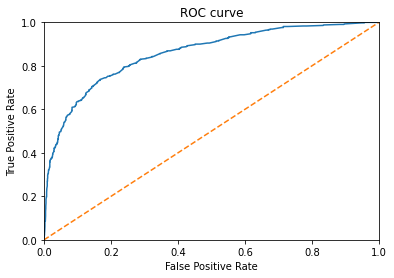

In [48]:
# plotting ROC curve

probabilities_testing = model_forest_opt_up.predict_proba(features_testing)
probabilities_one_testing = probabilities_testing[:, 1]

fpr, tpr, thresholds = roc_curve(target_testing, probabilities_one_testing)

# ploting the graph
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [49]:
# finding the area under the ROC curve (AUC-ROC)


auc_roc = roc_auc_score(target_testing, probabilities_one_testing)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8572362869198313


## Conclusion

The optimized Random Forest model, trained using upsampled data, has successfully passed the threshold of a 0.59 F1 score, with a final score of 0.61 when using the test data. This indicated that there is a moderately good harmony between recall and precision, and that the model has done an adequate job of making positive predictions (that a customer will churn). There is obviously room for future improvements. 

When examining the ROC curve and the AUC-ROC, the curve looks high quality, indicating a higher quality model. The AUC-ROC value of 0.85 tells that the model has done well in distinguishing between positive and negative predictions. 

Throughout this project, I have navigated through the challenges of taking a provided dataset and:

* Preparing it for modeling
* Splitting it into training, validation and test sets
* Developing models without fixing class imbalances 
* Fixing class imbalances with upsampling and downsampling
* Redeveloping new models, and training them with the new datasets
* Selecting a final optimized model and running the test data on it to evaluate its final performance

Additionally, after adding AUC-ROC scoring to each of the models, it was interesting to see that the AUC-ROC score was higher for each upsample-trained model, compared to the respective downsample-trained model.

While the model has passed the required F1 score, I wonder if a more robust dataset or different models could have helped create a better performing model. 